In [47]:
from mnist import MNIST
import numpy as np

In [48]:
mnist = MNIST('/Users/gongjinghaocheng/MNIST_analysis/data')
x_train, y_train = mnist.load_training()
x_test, y_test = mnist.load_testing()

In [49]:
# standardize by 255
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test)
y_test = np.array(y_test).reshape(-1,1)

# GP (slow, need embedding)

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [ ]:
kernel = 1.0 * RBF(length_scale=784)

In [ ]:
#clf = GaussianProcessClassifier(kernel).fit(x_train, y_train)

In [ ]:
#y_hat_test = clf.predict(x_test)

In [ ]:
#sum(y_hat_test!=y_test)/len(y_test)

# Softmax regression

refer: https://datascienceplus.com/mnist-for-machine-learning-beginners-with-softmax-regression/

https://www.geeksforgeeks.org/softmax-regression-using-tensorflow/

In [31]:
import tensorflow as tf

In [32]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Shape of feature matrix: (55000, 784)
Shape of target matrix: (55000, 10)
One-hot encoding for 1st observation:
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


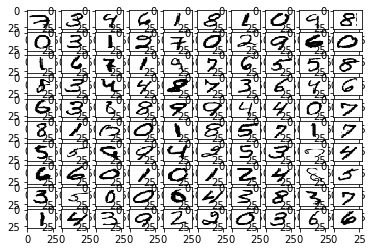

In [33]:
print("Shape of feature matrix:", mnist.train.images.shape) 
print("Shape of target matrix:", mnist.train.labels.shape) 
print("One-hot encoding for 1st observation:\n", mnist.train.labels[0]) 
  
# visualize data by plotting images 
fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(mnist.train.images[k].reshape(28,28), aspect='auto',cmap='Greys') 
        k += 1
plt.savefig('sample_digit')

In [40]:
# number of features 
num_features = 784
# number of target labels 
num_labels = 10
# learning rate (alpha) 
learning_rate = 0.05
# batch size 
batch_size = 128
# number of epochs 
num_steps = 5001
  
# input data 
train_dataset = mnist.train.images 
train_labels = mnist.train.labels 
test_dataset = mnist.test.images 
test_labels = mnist.test.labels 
valid_dataset = mnist.validation.images 
valid_labels = mnist.validation.labels 
  
# initialize a tensorflow graph 
graph = tf.Graph() 
  
with graph.as_default(): 
    """ 
    defining all the nodes 
    """
  
    # Inputs 
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features)) 
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels)) 
    tf_valid_dataset = tf.constant(valid_dataset) 
    tf_test_dataset = tf.constant(test_dataset) 
  
    # Variables. 
    weights = tf.Variable(tf.truncated_normal([num_features, num_labels])) 
    biases = tf.Variable(tf.zeros([num_labels])) 
  
    # Training computation. 
    logits = tf.matmul(tf_train_dataset, weights) + biases 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( 
                        labels=tf_train_labels, logits=logits)) 
  
    # Optimizer. 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 
  
    # Predictions for the training, validation, and test data. 
    train_prediction = tf.nn.softmax(logits) 
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases) 
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases) 

In [41]:
# utility function to calculate accuracy 
def accuracy(predictions, labels): 
    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
    accu = (100.0 * correctly_predicted) / predictions.shape[0] 
    return accu 
  
with tf.Session(graph=graph) as session: 
    # initialize weights and biases 
    tf.global_variables_initializer().run() 
    print("Initialized") 
  
    for step in range(num_steps): 
        # pick a randomized offset 
        offset = np.random.randint(0, train_labels.shape[0] - batch_size - 1) 
  
        # Generate a minibatch. 
        batch_data = train_dataset[offset:(offset + batch_size), :] 
        batch_labels = train_labels[offset:(offset + batch_size), :] 
  
        # Prepare the feed dict 
        feed_dict = {tf_train_dataset : batch_data, 
                     tf_train_labels : batch_labels} 
  
        # run one step of computation 
        _, l, predictions = session.run([optimizer, loss, train_prediction], 
                                        feed_dict=feed_dict) 
  
        if (step % 500 == 0): 
            print("Minibatch loss at step {0}: {1}".format(step, l)) 
            print("Minibatch accuracy: {:.1f}%".format( 
                accuracy(predictions, batch_labels))) 
            print("Validation accuracy: {:.1f}%".format( 
                accuracy(valid_prediction.eval(), valid_labels))) 
  
    print("\nTest accuracy: {:.1f}%".format( 
        accuracy(test_prediction.eval(), test_labels)))

Initialized
Minibatch loss at step 0: 16.52779769897461
Minibatch accuracy: 15.6%
Validation accuracy: 16.3%
Minibatch loss at step 500: 1.4155375957489014
Minibatch accuracy: 70.3%
Validation accuracy: 63.3%
Minibatch loss at step 1000: 1.3003650903701782
Minibatch accuracy: 75.0%
Validation accuracy: 75.0%
Minibatch loss at step 1500: 0.886082649230957
Minibatch accuracy: 79.7%
Validation accuracy: 79.5%
Minibatch loss at step 2000: 0.807283341884613
Minibatch accuracy: 75.0%
Validation accuracy: 81.8%
Minibatch loss at step 2500: 0.6832556128501892
Minibatch accuracy: 81.2%
Validation accuracy: 83.7%
Minibatch loss at step 3000: 0.8031059503555298
Minibatch accuracy: 84.4%
Validation accuracy: 84.8%
Minibatch loss at step 3500: 0.8195739984512329
Minibatch accuracy: 82.0%
Validation accuracy: 85.6%
Minibatch loss at step 4000: 0.5697466731071472
Minibatch accuracy: 85.2%
Validation accuracy: 86.0%
Minibatch loss at step 4500: 1.0678738355636597
Minibatch accuracy: 73.4%
Validation a

# CNN

In [9]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

8


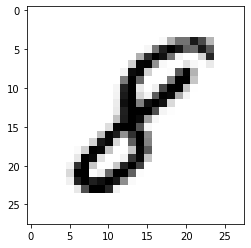

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [11]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10) # 10 for 98.5%


Epoch 1/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.2044 - accuracy: 0.9387
Epoch 2/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0842 - accuracy: 0.9740
Epoch 3/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0577 - accuracy: 0.9819
Epoch 4/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.0429 - accuracy: 0.9856
Epoch 5/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.0349 - accuracy: 0.9882
Epoch 6/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.0298 - accuracy: 0.9898
Epoch 7/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0247 - accuracy: 0.9914
Epoch 8/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.0201 - accuracy: 0.9931
Epoch 9/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.0199 - accuracy: 0.9934
Epoch 10/20
60000/60000 [===========

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/step


[0.07499189306830749, 0.9854000210762024]

# random forest classifier

refer: https://github.com/vneogi199/Handwritten-Digit-Recognition-Using-Random-Forest/blob/master/Handwritten%20Digit%20Classification.ipynb

In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [51]:
print(x_train.shape)
y_train = y_train.ravel()
print(y_train.shape)

(60000, 784)
(60000,)


In [52]:
print(x_test.shape)
y_test = y_test.ravel()
print(y_test.shape)

(10000, 784)
(10000,)


In [53]:
clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

In [54]:
prediction_validation = clf.predict(x_test)

In [55]:
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_validation)))

Validation Accuracy: 0.9686


# SVM (Slow, need embedding)

In [ ]:
from sklearn import datasets, svm, metrics

In [ ]:
classifier = svm.SVC(C=200,kernel='rbf',gamma=0.01,cache_size=8000,probability=False)

In [ ]:
clf = classifier.fit(x_train, y_train)

In [ ]:
prediction_validation = clf.predict(x_test)

In [ ]:
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_validation)))

# XGboost (package not installable)

# Data Augmentation

refer:https://solvemprobler.com/blog/2017/09/29/range-of-convolutional-neural-networks-on-fashion-mnist-dataset/